# Is (unigram) sentiment analysis a useful predictor of price in the SF Bay Area craigslist rental market?

In October/November of 2018, I was assigned a project in my UC Davis Introduction to Statistical Data Science class (STA 141A). I performed an exploratory data analysis of the California craigslist apartment rental market using common features like price, square feet, bedrooms and bathrooms, pet-friendly, etc. 

After my assignment submission, I was curious about the postings' body text feature. I wanted to test if there was a significant linear relationship between how a post was written, and the posted monthly rent price. I looked up a simple sentiment analysis tutorial (tidytextmining.com/sentiment.html) and got to work.

#### The Data

The dataset in question is a download of the cragslist 'apartments' tab, taken from multiple region sites on October 15, 2018. I have subsetted the data based on five counties, located in the south-eastern San Francisco bay area. The counties of mention are San Francisco, San Mateo, Santa Clara, Alameda, and Contra Costa. 

The data were cleaned to remove abnormal values, outliers, and unused features. Text was cleaned to remove ubiquitous strings (such as 'QR Code Link to This Post' and 'hide/unhide'). 

The code used to clean these data can be found in clean_data.r, called separately from this notebook to avoid clutter.

In [1]:
sbay = readRDS('sbay.rds')

#### Utility Functions

I sought to practice some modular programming to better organize this report.

- functions.r -- A set of utility functions used for an initial, superficial glance at the data. Includes basic text cleaning and tokenizing functions, a unique-repeat-value feature analysis table, and a token-mean table for calculating the average price of each word among the posts in which it is included.

- get_sentiment.r -- Contains two functions that perform sentiment analysis based on two lexicons. The one used in this report is the NRC Word-Emotion Association Lexicon (EmoLex), from Saif Mohammed and Peter Turney (saifmohammad.com/WebPages/NRC-Emotion-Lexicon.htm).

- plots.r -- Contains the ggplot2 and ggmap visuals contained here. These also inherit from map_sf.r and themes.r, which contain the various calls needed to build geographic maps, as well as a clean, bordered map theme.

In [3]:
source('functions.r')
source('get_sentiment.r')
source('plots.r')

#### get_sentiments_nrc()

In the below line, I call get_sentiments_nrc. This function does several things:

- computes a word count of each word in each observation's post text
- computes an inner join with the NRC lexicon; all words contained in the post found to be in the NRC lexicon are kept, the rest are discarded.
- adds an additional 20 columns to the data frame for each sentiment's frequency and proportion. Positive/negative features and 'emotion' feature proportions are calculated separately.

The NRC lexicon maps 6468 unique words to positive and negative sentiments, and 8 different emotions: trust, fear, sadness, anger, surprise, disgust, joy, and anticipation.

As this implementation uses of loops instead of vectors (and I've yet to learn how to suppress warning messages in IRKernel), it takes awhile. I've commented it out and saved the output to sbay_nrc.r for convenience.

In [5]:
# ptm = proc.time()

# sbay = get_sentiments_nrc(sbay, 'text')
# saveRDS(sbay, 'sbay_nrc.r')

# ptm = proc.time() - ptm

sbay = readRDS('sbay_nrc.r')

In [9]:
print(ptm)

   user  system elapsed 
188.285   2.096 188.760 


It takes over 3 minutes to compute these features across 10870 rows of the data. In the future, I endeavor to Vectorize() more of my code, though doing so with each posting's text as a separate string has proved tricky.

#### Sentiment Map

Using the ggmap and ggplot2 libraries, every emotion is mapped to a scatter overlaid on a map. I'm still working on better ways to visualize the data here, but it's clear that emotions like 'trust' and 'joy' are the most commonly occurring among the posts, while 'disgust' and 'anger' are less common but still present.

Warning message:
“Removed 384 rows containing missing values (geom_point).”

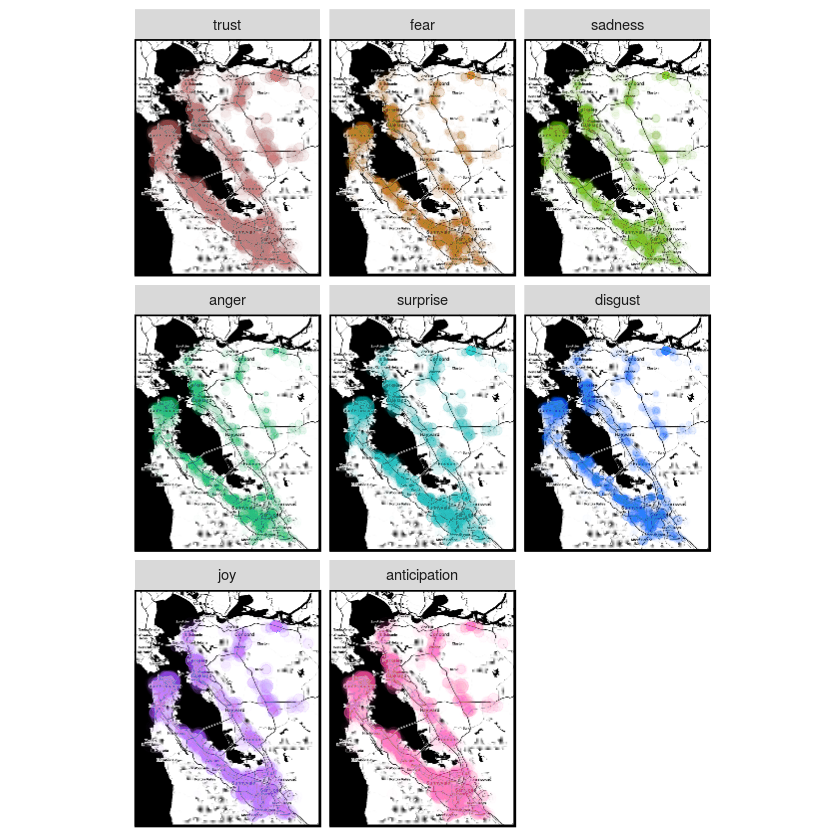

In [6]:
sentiment_map

#### Sentiment correlation with price

How do emotions relate to price? Below are each sentiment's calculated correlation with the 'price' feature.

The correlations are weak, and even the sign of the values defies intuition. Could 'anger' really have a stronger relationship with higher-value apartments than positive emotions in general? Could 'trust' be an emotion sought marginally more often at lower price ranges? A hesitant abstraction would be that high-value apartments are also prone to high-stress, low-scruple landlords--but I'm more tempted to say that these sentiments are simply not strong predictors of price.

In [7]:
cor(sbay[,c('price', sentiment_titles)])[1,]

price        trust         fear     negative      sadness        anger 
 1.000000000 -0.017089240  0.052760984  0.048963276  0.008660752  0.056461917 
    surprise     positive      disgust          joy anticipation 
 0.010723751  0.031789120 -0.060723777  0.029807851  0.027204409

#### Assumptions of Linearity

Examining a point plot of the 'positive' and 'negative' sentiments, overlaid with a density contour plot, we can see that there's only slight reason to consider a strong positive relationship between sentiment and price.

Ultimately, though an interesting experiment, it seems like sentiment mined from craigslist postings has little relationship to the rental price.

Warning message:
“Removed 15 rows containing non-finite values (stat_density2d).”Warning message:
“Removed 15 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 15 rows containing missing values (geom_point).”

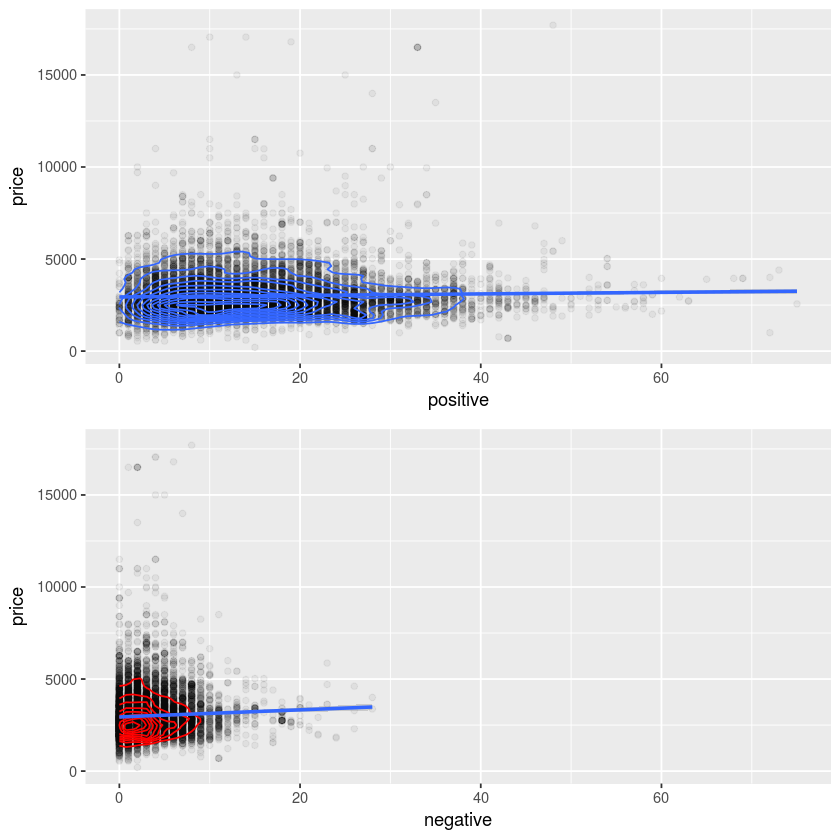

In [8]:
grid.arrange(pos, neg)

#### Conclusions

While I'm disappointed to not find stronger relationships between the data I mined and the geography of the rental housing market, it did answer a question that burned in my mind after my initial EDA of the more general features.

There are several places for improvement within this analysis:

##### The method of sentiment analysis

I used only one sentiment lexicon of 3 available through tidytext. This method in general is also simplistic: analysis at the unigram (individual word) level is textual analysis of the most rudimentary kind. As this was my first experiment with NLP, this was fitting for the purpose, but in the future there's plenty to be learned from more syntactic analysis.

##### The highest-level approach: Simpson's Paradox

At a future date, I'll return to these methods with more aggressive geographical subsetting. Both the 'county' and 'place' (city-level) features may harbor significant trends in sentiment that would not appear in this top-level approach.